In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
file_path = "/content/drive/MyDrive/Heart issue/Medicaldataset.csv"


In [8]:
df = pd.read_csv(file_path)

In [9]:
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [10]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [13]:
#Replace value 0 to male and 1 to female
df['Gender'] = df['Gender'].replace({0: 'male', 1: 'female'})

#Replace value positive to heart_issue and nigative to without_issue
df['Result'] = df['Result'].replace({'positive': 'heart_issue', 'negative': 'without_issue'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   object 
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 92.9+ KB


In [15]:
df.tail(3)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1316,45,female,85,168,104,96.0,1.24,4.250,heart_issue
1317,54,female,58,117,68,443.0,5.80,0.359,heart_issue
1318,51,female,94,157,79,134.0,50.89,1.770,heart_issue


In [17]:
#create a new column acc to age group usinf age column
def categorize_age(age):
    if age < 13:
        return 'Kid'
    elif age < 20:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    elif age >= 60:
        return 'Senior'
    else:
        return 'Unknown'

df['age_group'] = df['Age'].apply(categorize_age)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   object 
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
 9   age_group                 1319 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 103.2+ KB


<BarContainer object of 3 artists>

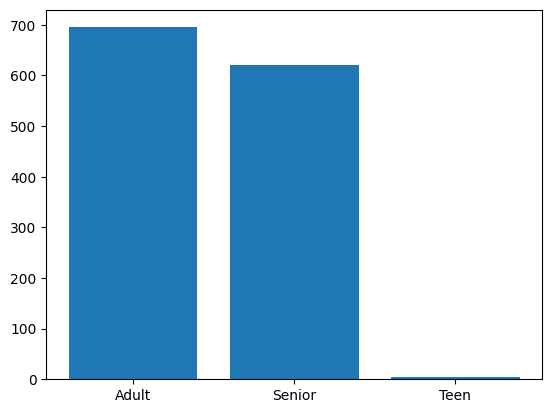

In [23]:
#see the bar chart graph that heart issue acc to age_group
age_group_counts = df['age_group'].value_counts()
plt.bar(age_group_counts.index, age_group_counts.values)


In [28]:
#age_group count
df['age_group'].value_counts()

,count
age_group,
Adult,695
Senior,620
Teen,4


<BarContainer object of 2 artists>

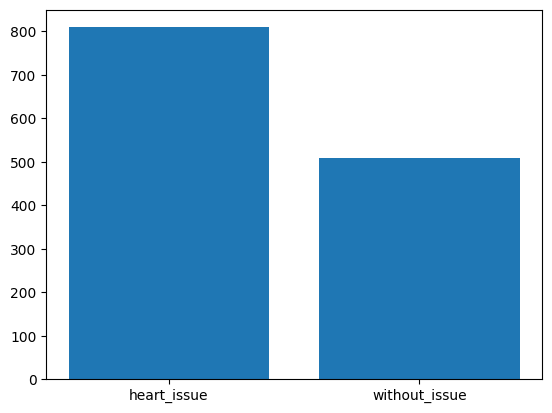

In [29]:
#creating a bar chart of heart_issue in result column
result_counts = df['Result'].value_counts()
plt.bar(result_counts.index, result_counts.values)

<Axes: xlabel='Result'>

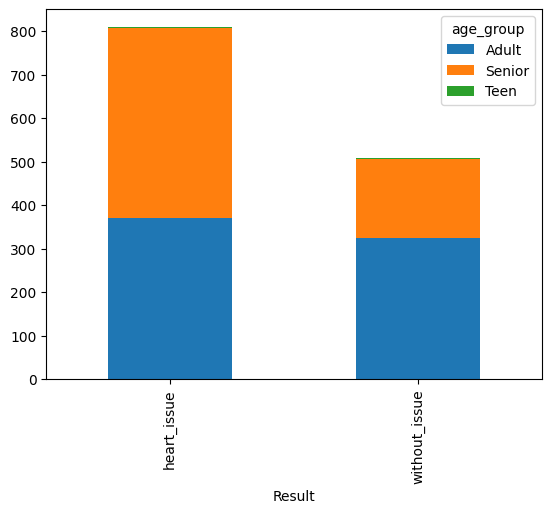

In [30]:
#creating a bar chart of heart_issue in result column vs age_group
result_age_group_counts = df.groupby(['Result', 'age_group']).size().unstack()
result_age_group_counts.plot(kind='bar', stacked=True)


In [36]:
#total number of seniors having heart_issue
senior_heart_issue = df[(df['age_group'] == 'Senior') & (df['Result'] == 'heart_issue')]
total_senior_heart_issue = len(senior_heart_issue)
total_senior_heart_issue

437

In [46]:
#does blood sugar is directly proptional to heart_issue
blood_sugar_heart_issue = df[(df['Blood sugar'] == 1) & (df['Result'] == 'heart_issue')]
total_blood_sugar_heart_issue = len(blood_sugar_heart_issue)
total_blood_sugar_heart_issue

0

In [49]:
#max value in blood sugar
df['Blood sugar'].min()

35.0

In [51]:
#list of all records with blood sugar level less than 50
low_blood_sugar = df[df['Blood sugar'] < 50]
low_blood_sugar

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,age_group
743,49,female,85,119,76,35.0,5.68,0.05,heart_issue,Adult


In [53]:
#droping record Low_blood)sugar we are dropping this because there is only one value
df = df.drop(low_blood_sugar.index)

In [55]:
#	What is the average, minimum, and maximum heart rate in the dataset?
heart_rate_stats = df['Heart rate'].describe()
heart_rate_stats

,Heart rate
count,1318.000000
mean,78.331563
std,51.649541
min,20.000000
25%,64.000000
50%,74.000000
75%,85.000000
max,1111.000000


In [59]:
#How does systolic and diastolic pressure vary across age groups?
age_pressure_stats = df.groupby('age_group')[['Systolic blood pressure', 'Diastolic blood pressure']].describe()
age_pressure_stats

Systolic blood pressure                                        \
                            count        mean        std    min     25%   
age_group                                                                 
Adult                       694.0  126.736311  26.261443   65.0  109.00   
Senior                      620.0  127.751613  26.060441   42.0  111.00   
Teen                          4.0  114.500000   2.645751  111.0  113.25   

                                Diastolic blood pressure             \
             50%     75%    max                    count       mean   
age_group                                                             
Adult      123.0  144.75  223.0                    694.0  72.293948   
Senior     125.0  142.00  223.0                    620.0  72.256452   
Teen       115.0  116.25  117.0                      4.0  69.000000   

                                                     
                 std   min   25%   50%   75%    max  
age_group                                            
Adult      14.101776  40.0  61.0  72.0  81.0  128.0  
Senior     14.009933  38.0  62.0  71.0  81.0  154.0  
Teen        8.524475  57.0  66.0  71.5  74.5   76.0

In [61]:
# What are the average Troponin and CK-MB levels for each gender?
gender_levels_stats = df.groupby('Gender')[['Troponin', 'CK-MB']].mean()
gender_levels_stats

,Troponin,CK-MB
Gender,,
female,0.415914,15.869102
male,0.255243,14.144497


In [62]:
#Compare heart rate and blood pressure between male and female
gender_heart_rate_stats = df.groupby(['Gender', 'Result'])['Heart rate'].describe()
gender_heart_rate_stats

count       mean        std   min   25%   50%   75%  \
Gender Result                                                               
female heart_issue    562.0  78.225979  46.490723  36.0  63.0  74.0  87.0   
       without_issue  307.0  75.703583  15.082131  20.0  64.0  74.0  84.0   
male   heart_issue    247.0  79.489879  67.462779  20.0  64.0  74.0  85.0   
       without_issue  202.0  81.202970  74.227654  40.0  63.0  76.0  84.0   

                         max  
Gender Result                 
female heart_issue    1111.0  
       without_issue   132.0  
male   heart_issue    1111.0  
       without_issue  1111.0

In [66]:
#male max heart rate
male_max_heart_rate = df[df['Gender'] == 'male']['Heart rate'].max()
male_max_heart_rate

1111

In [86]:
#heart rate higer than 300
high_heart_rate = df[df['Heart rate'] > 300]
high_heart_rate

#drop these values because its giving 1111 heart rate which is not possible
df = df.drop(high_heart_rate.index)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 0 to 1318
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1315 non-null   int64  
 1   Gender                    1315 non-null   object 
 2   Heart rate                1315 non-null   int64  
 3   Systolic blood pressure   1315 non-null   int64  
 4   Diastolic blood pressure  1315 non-null   int64  
 5   Blood sugar               1315 non-null   float64
 6   CK-MB                     1315 non-null   float64
 7   Troponin                  1315 non-null   float64
 8   Result                    1315 non-null   object 
 9   age_group                 1315 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 113.0+ KB


In [76]:
#Among patients with high blood pressure (e.g. systolic > 140), what percentage had positive results?
high_blood_pressure = df[df['Systolic blood pressure'] > 140]
high_blood_pressure_positive = high_blood_pressure[high_blood_pressure['Result'] == 'heart_issue']
high_blood_pressure_positive_percentage = round((len(high_blood_pressure_positive) / len(high_blood_pressure)) * 100,2)
high_blood_pressure_positive_percentage

57.1

In [80]:
#How common are elevated Troponin levels (>0.04 ng/mL) and how do they relate to CK-MB?
elevated_troponin = df[df['Troponin'] > 0.04]
correlation_troponin_ckmb = round(elevated_troponin['Troponin'].corr(elevated_troponin['CK-MB']),4)
correlation_troponin_ckmb

np.float64(0.0021)

In [83]:
#Are there duplicate or constant values (e.g., CK-MB = 300 across many rows)?
duplicate_rows = df[df.duplicated()]
constant_rows = df[df['CK-MB'] == 300]
duplicate_rows

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,age_group


In [84]:
#Are any Troponin readings missing or zero where a positive diagnosis exists?
missing_troponin = df[(df['Troponin'].isnull()) & (df['Result'] == 'heart_issue')]
missing_troponin

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,age_group
